In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

/home/sara/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#h5f = h5py.File('overlapping_chromosomes_examples.h5','r')
h5f = h5py.File('LowRes_13434_overlapping_pairs.h5','r')
pairs = h5f['dataset_1'][:] # pairs.shape = (13434, 94, 93, 2)
h5f.close()

In [3]:
pairs.shape

(13434, 94, 93, 2)

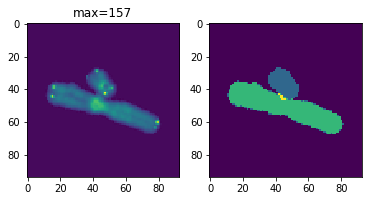

In [4]:
%matplotlib inline

grey = pairs[220,:,:,0]
mask = pairs[220,:,:,1]
#%matplotlib inline
plt.subplot(121)
plt.imshow(grey)
plt.title('max='+str(grey.max()))
plt.subplot(122)
plt.imshow(mask)

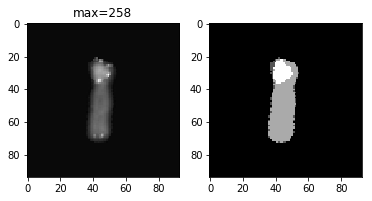

In [18]:
grey = pairs[13433,:,:,0]
mask = pairs[13433,:,:,1]
%matplotlib inline


plt.subplot(121)
plt.imshow(grey,cmap='gray')
plt.title('max='+str(grey.max()))
plt.subplot(122)
plt.imshow(mask,cmap='gray')

In [6]:
# Display the keys of the h5f file
h5f = h5py.File('LowRes_13434_overlapping_pairs.h5','r')
list(h5f.keys())

['dataset_1']

In [7]:
def importData(filepath):
    '''
    Loads the HDF5 file and returns all the data pairs
    '''
    h5f = h5py.File(filepath,'r')
    pairs = h5f['dataset_1'][:]
    return pairs

def plotImagePair(greyscale, mask):
    '''
    Plots a pair of images 
    '''
    #%matplotlib inline
    plt.subplot(121)
    plt.imshow(grey)
    plt.title('max='+str(grey.max()))
    plt.subplot(122)
    plt.imshow(mask)
    plt.show()

In [8]:
pairs.shape

(13434, 94, 93, 2)

In [11]:
import PIL # pillow needed for scipy.misc's image functions
import sys
from matplotlib import pyplot as plt # for plotting
import utils
from PIL import Image
import numpy as np
import os
import importlib

In [13]:
for i in range(0, pairs.shape[0]):
    temp_array = pairs[i, :, :, 0]
    min_of_temp_array = temp_array.min()
    if min_of_temp_array < 0:
        temp_array = temp_array - min_of_temp_array
    max_of_temp_array = temp_array.max()
    if max_of_temp_array > 255:
        temp_array = temp_array*255/float(max_of_temp_array)
    temp_Image = Image.fromarray(temp_array.astype('uint8'), mode='L')
    temp_Image.save('overlapping-chromosomes_3channel/x_' + str(i) + '.png')#, filepath='')

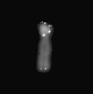

In [14]:
temp_Image